<a href="https://colab.research.google.com/github/sahilfaizal01/Facial_Recognition_System/blob/main/VGGFace_Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
from tensorflow.keras.models import model_from_json
model.load_weights('/content/drive/MyDrive/vggFace/vgg_face_weights.h5')

In [ ]:
def preprocess_image(image_path):
  img = load_img(image_path, target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img)
  return img

def findCosineSimilarity(source_representation, test_representation):
  a = np.matmul(np.transpose(source_representation),test_representation)
  b = np.sum(np.multiply(source_representation, source_representation))
  c = np.sum(np.multiply(test_representation, test_representation))
  return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

vgg_face_descriptor = Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [ ]:
epsilon = 0.40

def verifyFace(img1,img2):
  img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
  img2_representation = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]

  cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)

  f = plt.figure()
  f.add_subplot(1,2,1)
  plt.imshow(image.load_img(img1))
  plt.xticks([]);plt.yticks([])
  f.add_subplot(1,2,2)
  plt.imshow(image.load_img(img2))
  plt.xticks([]);plt.yticks([])
  plt.show(block=True)

  print("Cosine Similarity: ",cosine_similarity)

  if(cosine_similarity > epsilon):
    print("They are same person")
  else:
    print("They are not the same person")


1/1 [==============================] - 1s 530ms/step


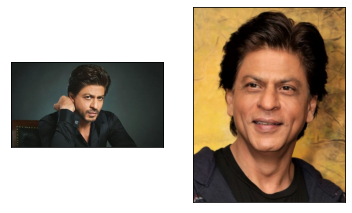

Cosine Similarity:  0.5514750778675079
They are same person


In [ ]:
verifyFace('/content/srk.jpeg','/content/srk.jpg')